In [7]:
%load_ext autoreload
%autoreload 2


In [16]:
from simulator import TrafficEnv
import torch
from trainer_ppo_class import unpack_obs
import numpy as np

def nearest_neighbor(next_paths, visited):
    next_paths[1-visited] = 1000
    print(next_paths)
    print(visited)
    i = np.argmin(next_paths)
    print('CHOSEN', i)
    return i

def test_nn(n):
    # env = TrafficEnv(trafficmap_dir='traffic_maps', time_per_step=20, max_steps=10)
    total_reward = 0
    for i in range(n):
        total_reward += evaluate_policy(nearest_neighbor)
    return total_reward/n


def evaluate_policy(policy, seed=42):
    env_test = TrafficEnv(trafficmap_dir='traffic_maps', time_per_step=20, max_steps=8)
    
    obs, _ = env_test.reset()
    next_paths = obs[0]
    done = False
    total_reward = 0
    for i in range(env_test.max_steps):
        action = policy(next_paths, obs[1])
        obs, reward, done, _, _ = env_test.step(action)
        
        total_reward += reward
        print(reward, end=' ')
        if done:
            break
    print()
    return total_reward

In [17]:
print(test_nn(100))

[1000.        1000.           2.0202262    3.123021     1.9422922
    1.1989563    2.8654065    2.0770319    2.623417     2.86022  ]
[False  True  True  True  True  True  True  True  True  True]
CHOSEN 5
10 [1000.        1000.           2.0202262    3.123021     1.9422922
  100.           2.8654065    2.0770319    2.623417     2.86022  ]
[False  True  True  True  True False  True  True  True  True]
CHOSEN 4
10 [1000.        1000.           2.0202262    3.123021   100.
  100.           2.8654065    2.0770319    2.623417     2.86022  ]
[False  True  True  True False False  True  True  True  True]
CHOSEN 2
10 [1000.        1000.         100.           3.123021   100.
  100.           2.8654065    2.0770319    2.623417     2.86022  ]
[False  True False  True False False  True  True  True  True]
CHOSEN 7
10 [1000.        1000.         100.           3.123021   100.
  100.           2.8654065  100.           2.623417     2.86022  ]
[False  True False  True False False  True False  True  True

/Users/caidenkiani/.virtualenvs/caiden1/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


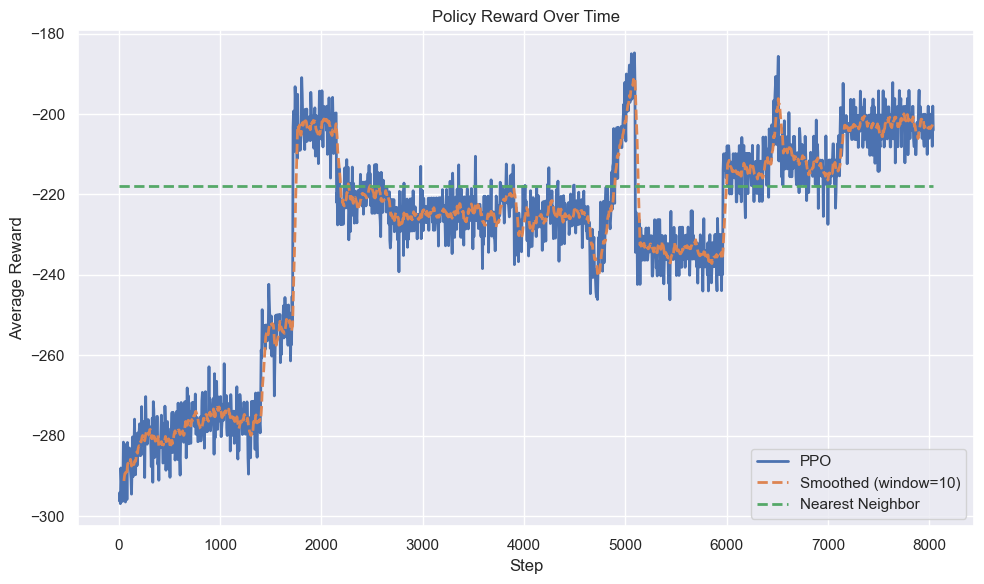

In [8]:
from simulator2 import TrafficEnv
import torch
from train_dql import unpack_obs
import numpy as np

def nearest_neighbor(next_paths, visited):
    next_paths[visited] = 1000
    print(next_paths)
    print(visited)
    i = np.argmin(next_paths)
    print('CHOSEN', i)
    return i

def test2_nn(n):
    # env = TrafficEnv(trafficmap_dir='traffic_maps', time_per_step=20, max_steps=10)
    total_reward = 0
    for i in range(n):
        total_reward += evaluate_policy(nearest_neighbor)
    return total_reward/n


def evaluate_policy(policy, seed=42):
    env_test = TrafficEnv(trafficmap_dir='traffic_maps2', time_per_step=2000, max_steps=8)
    
    obs, _ = env_test.reset()
    next_paths = obs[0]
    done = False
    total_reward = 0
    for i in range(env_test.max_steps):
        action = policy(next_paths, obs[1])
        obs, reward, done, _, _ = env_test.step(action)
        
        total_reward += reward
        print(reward, end=' ')
        if done:
            break
    print()
    return total_reward

In [9]:
print(test2_nn(100))

[   9.192094   10.329031    9.520978    9.032336    9.975325   10.130192
   10.959369   10.924606   10.425225 1000.      ]
[False False False False False False False False False  True]
CHOSEN 3
tensor(-9.0323) [   9.192094   10.329031    9.520978 1000.          9.975325   10.130192
   10.959369   10.924606   10.425225 1000.      ]
[False False False  True False False False False False  True]
CHOSEN 0
tensor(-10.4636) [1000.         10.329031    9.520978 1000.          9.975325   10.130192
   10.959369   10.924606   10.425225 1000.      ]
[ True False False  True False False False False False  True]
CHOSEN 2
tensor(-9.9774) [1000.         10.329031 1000.       1000.          9.975325   10.130192
   10.959369   10.924606   10.425225 1000.      ]
[ True False  True  True False False False False False  True]
CHOSEN 4
tensor(-9.6778) [1000.         10.329031 1000.       1000.       1000.         10.130192
   10.959369   10.924606   10.425225 1000.      ]
[ True False  True  True  True False

In [41]:
import pandas as pd
import numpy as np

# Number of rows
n_rows = 100

# Generate random steps (between 3 and 10 steps per plateau)
min_step, max_step = 3, 10
values = []
current = 0

i = 0
while i < n_rows:
    step_size = np.random.randint(min_step, max_step + 1)
    step_end = min(i + step_size, n_rows)
    values.extend([current] * (step_end - i))
    current += 5
    i = step_end

# Create DataFrame
df = pd.DataFrame({'staircase': values})

print(df.head(20))


    staircase
0           0
1           0
2           0
3           0
4           0
5           0
6           0
7           0
8           5
9           5
10          5
11          5
12          5
13          5
14          5
15          5
16          5
17          5
18         10
19         10
